<a href="https://colab.research.google.com/github/Nandika28/Task2_ObjectDetection/blob/master/yolov5_objectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 4)) (0.29.21)
Requirement already up-to-date: matplotlib>=3.2.2 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 5)) (3.3.1)
Requirement already up-to-date: numpy>=1.18.5 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 6)) (1.19.1)
Requirement already up-to-date: opencv-python>=4.1.2 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 7)) (4.4.0.42)
Requirement already up-to-date: pillow in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 8)) (7.2.0)
Requirement already up-to-date: PyYAML>=5.3 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 9)) (5.3.1)
Requirement already up-to-date: scipy>=1.4.1 in /usr/local/lib/python3.6/dist-packages

In [ ]:
import torch
from IPython.display import Image  # for displaying images
from utils.google_utils import gdrive_download  # for downloading models/datasets

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [ ]:
!torch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `torch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)'


In [ ]:
%cd /content/
!curl -L "https://app.roboflow.com/ds/n61UWL23my?key=cTQmvGN28i" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0    953      0 --:--:-- --:--:-- --:--:--   952
100 14.8M  100 14.8M    0     0  6997k      0  0:00:02  0:00:02 --:--:-- 28.4M
Archive:  roboflow.zip
 extracting: test/images/6f90183409f23094_jpg.rf.04706bca500158cebf0df0bfa5421955.jpg  
 extracting: test/images/0bedac678c600427_jpg.rf.26d2ecb0895dedd226ec142ee2bbf17b.jpg  
 extracting: test/images/0de27125f7df7581_jpg.rf.60e3df2564ad16a94887c677b4f4b0fa.jpg  
 extracting: test/images/1a55e0a6975fd286_jpg.rf.0be46c3ff4937055a31f9342df34418f.jpg  
 extracting: test/images/7ca9e5260a5885d4_jpg.rf.1e24b7567d54bbb91bc2e804984f9e12.jpg  
 extracting: test/images/dfd7234bd4d8232e_jpg.rf.36d81550af519ec189de7b7f59256534.jpg  
 extracting: test/images/0c7c0c689ac49080_jpg.rf.2556b012b993ae685001980136a7943a.jpg  
 extracting: test/images/e260bc6f89e

In [ ]:
!python /content/yolov5/train.py --data /content/data.yaml --cfg ./models/yolov5s.yaml

Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./yolov5/./models/yolov5s.yaml', data='/content/data.yaml', device='', epochs=300, evolve=False, global_rank=-1, hyp='./yolov5/data/hyp.finetune.yaml', img_size=[640, 640], local_rank=-1, logdir='runs/', multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2020-08-23 07:20:02.908999: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'momentum': 0.94, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.4, 'cls_pw': 1.0, 'obj': 0.5, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='inference/images', update=False, view_img=False, weights=['yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... 
Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 173, in <module>
    detect()
  File "/content/yolov5/detect.py", line 55, in detect
    dataset = LoadImages(source, img_size=imgsz)
  File "/content/yolov5/utils/datasets.py", line 86, in __init__
    raise Exception('ERROR: %s does not exist' % p)
Exception: ERROR: /content/inference/images does not exist


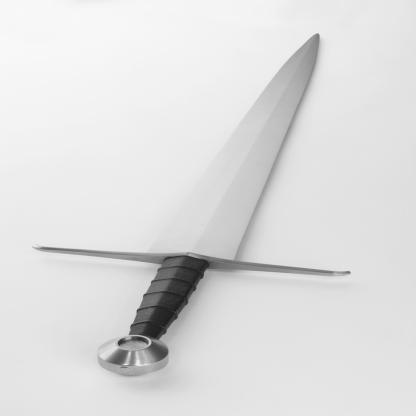

In [ ]:
!python /content/yolov5/detect.py --weights yolov5s.pt --img 416 --conf 0.4
Image(filename='/content/valid/images/01403369608622ab_jpg.rf.77fcf07c5391ba2689a01d4d95736827.jpg', width=600)

In [ ]:
!python /content/yolov5/detect.py --source /content/valid/images/00c32ff817183917_jpg.rf.f22ec48b74fa26c10106b6097cde3c4c.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/valid/images/00c32ff817183917_jpg.rf.f22ec48b74fa26c10106b6097cde3c4c.jpg', update=False, view_img=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... 
Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
image 1/1 /content/valid/images/00c32ff817183917_jpg.rf.f22ec48b74fa26c10106b6097cde3c4c.jpg: 640x640 3 persons, 1 backpacks, Done. (0.040s)
Results saved to inference/output
Done. (0.096s)


In [ ]:
# Run YOLOv5s on COCO test-dev2017 with argument --task test
!python /content/yolov5/test.py --weights /content/yolov5s.pt --data /content/data.yaml

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/data.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['/content/yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... 
Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
Scanning labels /content/valid/labels.cache (109 found, 0 missing, 0 empty, 0 duplicate, for 109 images): 109it [00:00, 9846.63it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 4/4 [00:06<00:00,  1.73s/it]
                 all         109         240    0.000521     0.00303     0.00364     0.00125
Speed: 28.1/2.3/30.4 ms inference/NMS/total per 640x640 image at batch-size 32


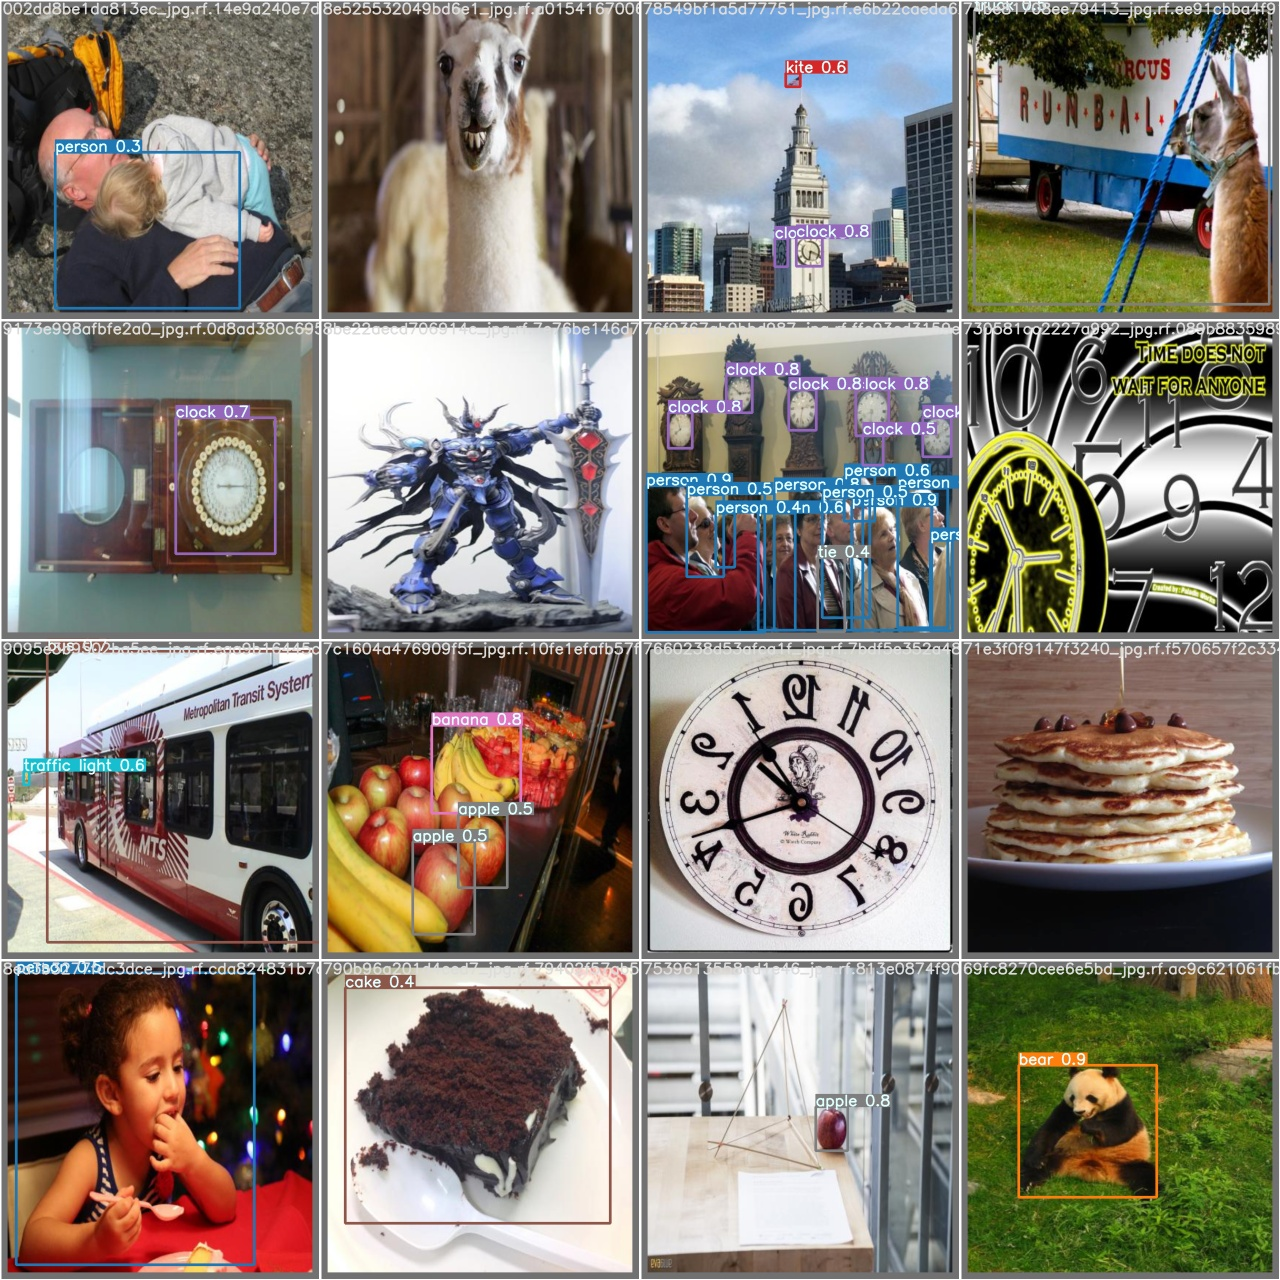

In [ ]:
Image(filename='/content/test_batch0_pred.jpg', width=900)  # view test image predictions

In [ ]:
!python /content/yolov5/detect.py --source /content/cupcakes.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/cupcakes.mp4', update=False, view_img=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... 
Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
video 1/1 (1/252) /content/cupcakes.mp4: 384x640 1 cakes, Done. (0.032s)
video 1/1 (2/252) /content/cupcakes.mp4: 384x640 1 cakes, Done. (0.032s)
video 1/1 (3/252) /content/cupcakes.mp4: 384x640 1 cakes, Done. (0.031s)
video 1/1 (4/252) /content/cupcakes.mp4: 384x640 1 cakes, Done. (0.031s)
video 1/1 (5/252) /content/cupcakes.mp4: 384x640 1 cakes, Done. (0.035s)
video 1/1 (6/252) /content/cupcakes.mp4: 384x640 1 cakes, Done. (0.031s)
video 1/1 (7/252) /content/cupcakes.mp4: 384x640 1 cakes, Done. (0.031s)
video 1/1 (8/252) /content/cupcakes.mp4: 384x640 1 cakes, Done. (0.031s)
v